In [278]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import anndata

sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

-----
anndata     0.9.2
scanpy      1.9.3
-----
PIL                         10.0.1
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.12.1
backcall                    0.2.0
brotli                      1.1.0
certifi                     2023.07.22
cffi                        1.16.0
charset_normalizer          3.3.0
colorama                    0.4.6
comm                        0.1.4
cycler                      0.12.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.8.0
decorator                   5.1.1
defusedxml                  0.7.1
exceptiongroup              1.1.3
executing                   1.2.0
fastjsonschema              NA
fqdn                        NA
h5py                        3.8.0
harmonypy                   NA
idna                        3.4
igraph                      0.10.8
importli

In [310]:
adata_pl =sc.read_h5ad('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/spleenR1_filtered.h5ad')


mapper=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/aPlwal.pri.V2.genome.annots.tsv")
mapper_dict = mapper.set_index('#gene_id')['EggNM.Preferred_name'].to_dict()

new_var_names_pl = []  # Create an empty list to store the updated variable names

# Iterate through each gene_id in the mapper_dict
for gene_id in adata_pl.var_names:
    # Check if the gene_id exists in adata_pl.var_names and if its mapping is not '.'
    if gene_id in mapper_dict.keys() and mapper_dict[gene_id] != '.':
        # Debugging: Print gene_id and its mapping
        print(f"Updating: {gene_id} -> {mapper_dict[gene_id]}")
        # If conditions are met, append the mapped gene_id to new_var_names_pl
        new_var_names_pl.append(mapper_dict[gene_id])
    else:
        # Debugging: Print gene_id that's not updated
        print(f"Not Updating: {gene_id}")
        # If conditions are not met, append the original gene_id to new_var_names_pl
        new_var_names_pl.append(gene_id)

# Update the variable names of adata_pl with the new_var_names_pl list
adata_pl.var_names = new_var_names_pl

Not Updating: SPX2
Not Updating: gene26599
Not Updating: gene26600
Not Updating: PKNOX2
Not Updating: HARB1
Not Updating: MYPOP-1
Not Updating: gene26611
Not Updating: LIN1
Not Updating: MYPOP-2
Not Updating: HARB1-1
Not Updating: RL23
Not Updating: LORF2
Not Updating: gene26619
Not Updating: gene26621
Not Updating: PGBD4
Not Updating: gene26623
Not Updating: gene26624
Not Updating: ZN583
Not Updating: SIAE
Not Updating: gene26636
Not Updating: gene26637
Not Updating: POL4-1
Not Updating: gene26639
Not Updating: POL3-1
Not Updating: MSD2
Not Updating: POL-3
Not Updating: POL-4
Not Updating: LORF2-2
Not Updating: gene26646
Not Updating: gene26648
Not Updating: POL3-2
Not Updating: POL2
Not Updating: LORF2-3
Not Updating: gene26653
Not Updating: POL4-2
Not Updating: ROBO3
Not Updating: HECAM
Not Updating: SRPR
Not Updating: YI31B
Not Updating: gene26663
Not Updating: YG31B-2
Not Updating: POL-5
Not Updating: gene26667
Not Updating: YG31B-3
Not Updating: LORF2-4
Not Updating: FXRD1
Not Up

In [312]:
adata_pl

AnnData object with n_obs × n_vars = 11978 × 36483
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'soup_assign', 'soup_status', 'scds_DropletType', 'combined_status', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name'
    obsm: 'PCA', 'UMAP'
    layers: 'logcounts'

In [144]:
#Assign Cell_types to the Clusters
#Loop over the Seurat clusters and assign cell types to the clusters
adata_pl.obs['Cell_types'] = 'NA'
# Define a dictionary to map cluster IDs to cell types
cluster_to_cell_type = {
    '0': 'T_cells',
    '1': 'B_cells',
    '2': 'Thymocytes',
    '3': 'T_cells',
    '4': 'Plasma_cells',
    '5': 'Monocytes',
    '6': 'Platelet',
    '7': 'Neutrophil',
    '8': 'Platelet',
    '9': 'Neutrophil',
    '10': 'B_cells',
    '11': 'Macrophage',
    '12': 'Neutrophil',
    '13': 'Erythrocyte',
    '14': 'Plasma_cells',
    '15': 'Neutrophil',
    '16': 'Monocytes',
    '17': 'NK_T_cells',
    '18': 'Neutrophil',
    '19': 'Monocytes',
    '20': 'Progenitor_cells'
}

# Use the dictionary to map cluster IDs to cell types
adata_pl.obs['Cell_types'] = adata_pl.obs['seurat_clusters'].map(cluster_to_cell_type)


In [145]:
adata_pl.obs['Cell_types'].value_counts()



Cell_types
T_cells             7277
B_cells             3953
Thymocytes          2127
Neutrophil          1550
Plasma_cells        1243
Platelet            1235
Monocytes            945
Macrophage           249
Erythrocyte          228
NK_T_cells           136
Progenitor_cells     102
Name: count, dtype: int64

In [305]:
#Performing QC
sc.pp.filter_cells(adata_pl, min_genes=200)
sc.pp.filter_genes(adata_pl, min_cells=3)
adata_pl.var['mt']=adata_pl.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata_pl, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
#adata_pl = adata_pl[adata_pl.obs.pct_counts_mt < 5, :]
adata_pl=adata_pl[adata_pl.obs.n_genes_by_counts < 2500, :]
blood_related_genes=['HBA1', 'HBA2', 'HBB1', 'HBB2', 'HBA3', 'HBS1L']
#Filtering out the blood related genes
adata_pl = adata_pl[:, ~adata_pl.var_names.isin(blood_related_genes)]
adata_pl.var_names_make_unique()

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [306]:
#Label the first column as barcode
index=adata_pl.obs.index
adata_pl.obs['Barcode']=index

In [309]:
adata_pl

AnnData object with n_obs × n_vars = 11978 × 29898
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'soup_assign', 'soup_status', 'scds_DropletType', 'combined_status', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'Barcode'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'X_name'
    obsm: 'PCA', 'UMAP'
    layers: 'logcounts'

In [219]:
#Save the adata_pl
adata_pl.write_h5ad('/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/spleenR1_filtered.h5ad')

In [227]:
sc.pp.normalize_total(adata_pl, target_sum=1e4)
sc.pp.log1p(adata_pl)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


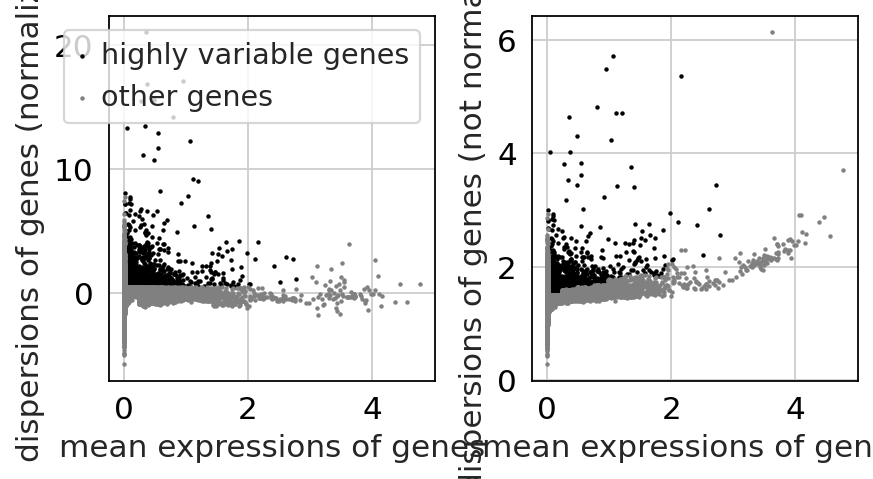

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [228]:
#Performing PCA
sc.pp.highly_variable_genes(adata_pl, min_mean=0.0125, max_mean=3, min_disp=0.5)
#Plotting the highly variable genes
sc.pl.highly_variable_genes(adata_pl)
sc.pp.pca(adata_pl, n_comps=50, use_highly_variable=True, svd_solver='arpack')


/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


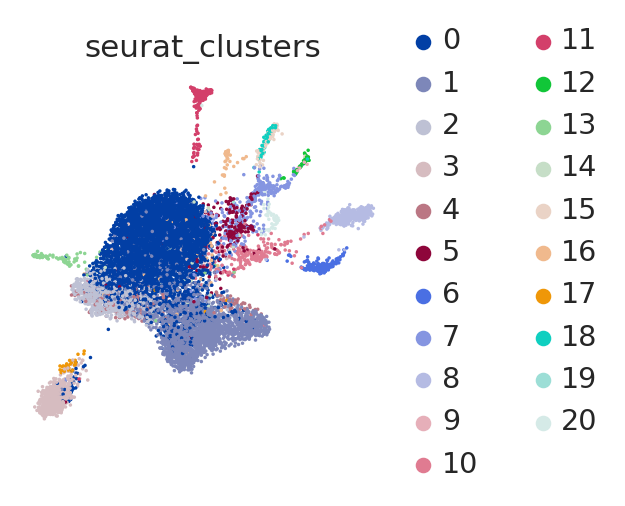

In [230]:
sc.pp.neighbors(adata_pl, n_neighbors=20, n_pcs=50)
sc.tl.umap(adata_pl)
sc.pl.umap(adata_pl, color='seurat_clusters')


In [231]:
|#Performing UMAP    
sc.pp.neighbors(adata_pl, n_neighbors=2, n_pcs=50)
sc.tl.umap(adata_pl)
sc.pl.umap(adata_pl, color=['Cell_types','seurat_clusters'])

SyntaxError: invalid syntax (178375362.py, line 1)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


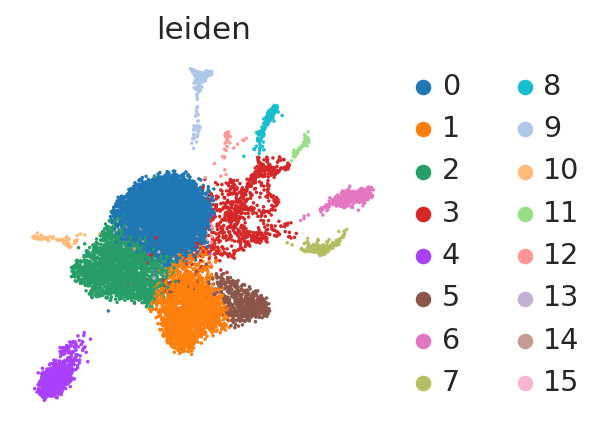

In [235]:
sc.tl.leiden(adata_pl, resolution=1.2)
sc.pl.umap(adata_pl, color='leiden')

In [ ]:
#Performing Leiden Clustering
sc.tl.leiden(adata_pl, resolution=0.5)
sc.pl.umap(adata_pl, color=['Cell_types','leiden'])

/home/nikvaku/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


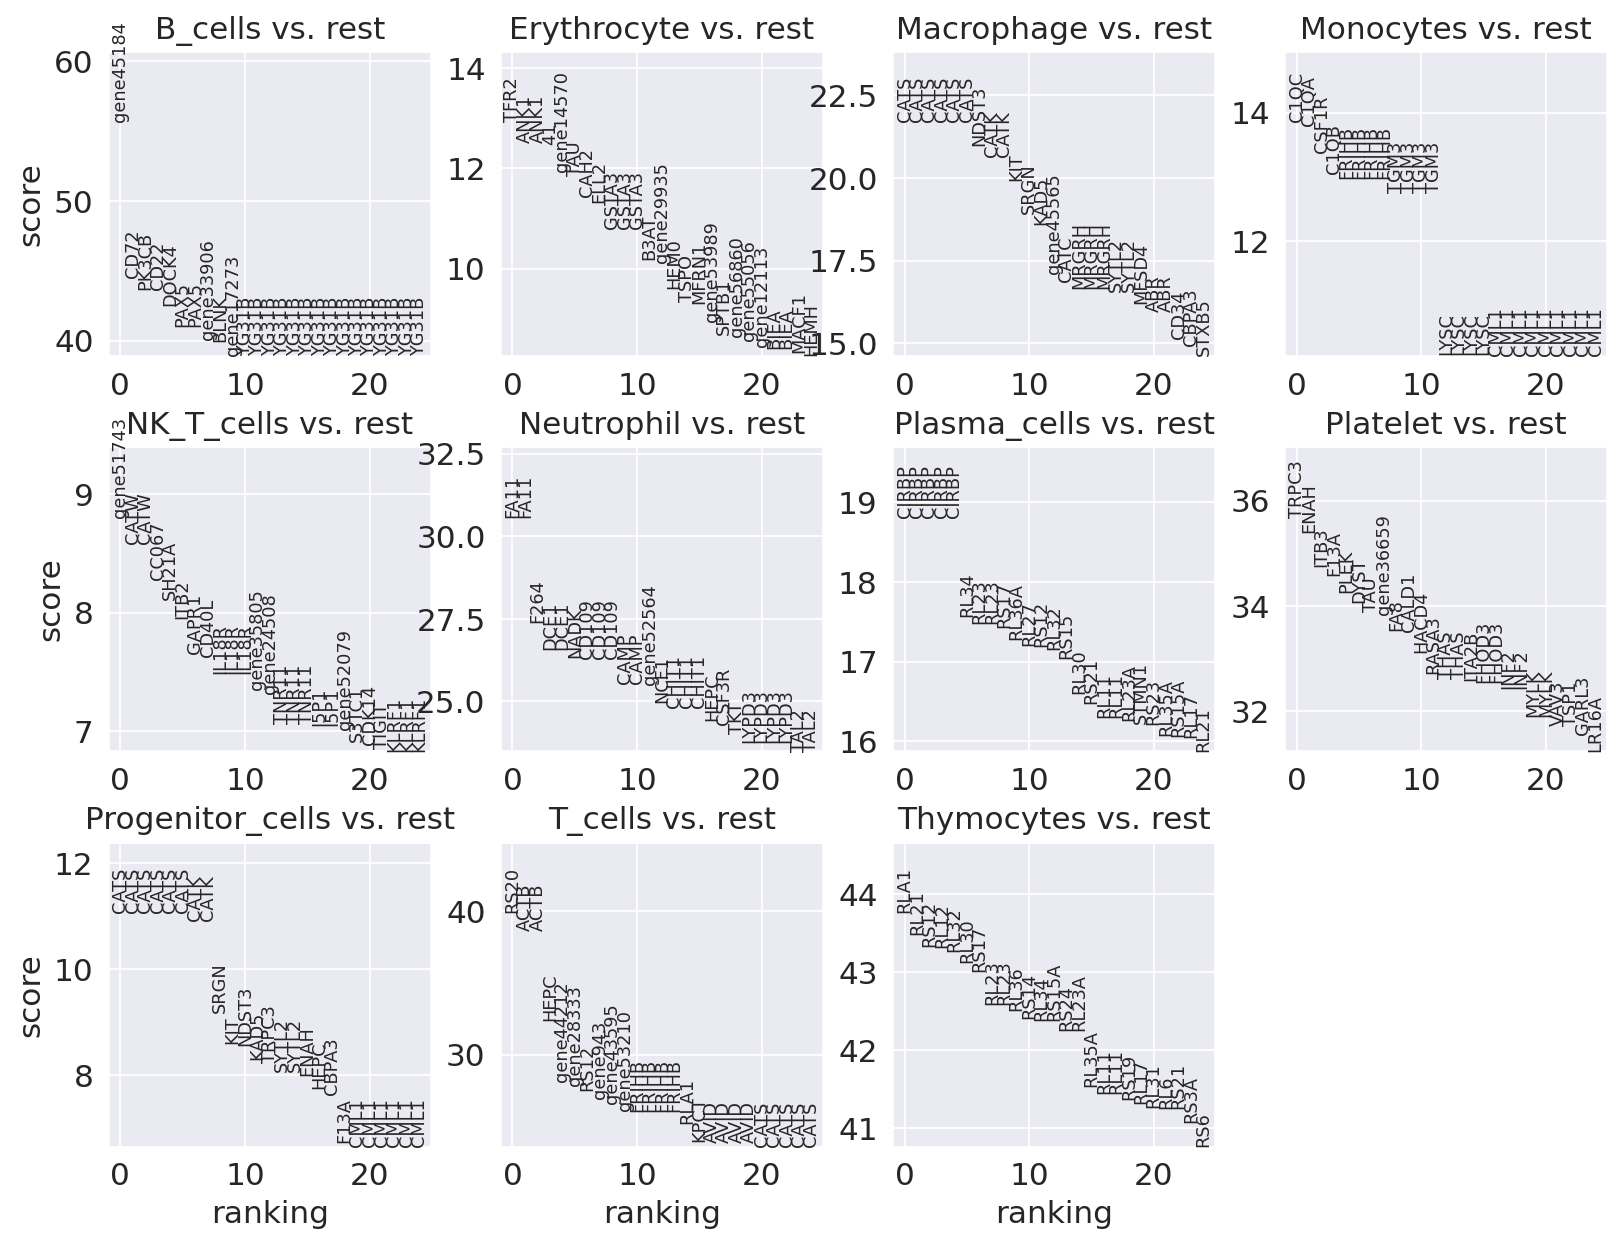

In [154]:
#Performing DEG
sc.tl.rank_genes_groups(adata_pl, 'Cell_types', method='wilcoxon')
sc.pl.rank_genes_groups(adata_pl, n_genes=25, sharey=False)


In [76]:
cell_type_leiden=pd.crosstab(adata_pl.obs['Cell_types'], adata_pl.obs['leiden'])
cell_type_leiden

leiden               0     1    2    3    4    5    6    7    8   9  10
Cell_types                                                             
B_cells            257  2219    3   10  154   12    1    0    0   0   0
Erythrocyte         21     8    4    0    0    0    0    0    0  67   0
Macrophage          14     5    0    5   13    0    0    0  127   0   0
Monocytes          115    27    0    1  162    0    0    1    0   0  25
NK_T_cells           0     1    3   36    0    0    0    0    0   0   0
Neutrophil          40    23    1    4  294    0    0  152    0   0   0
Plasma_cells        22     9  188    0    6    0    0    0    0   0   0
Platelet             0     0    0    0    4  287  160    0    0   0   0
Progenitor_cells     0     0    0    0   41    0    0    1    1   0   0
T_cells           5608   419    9  662    2    0    0    0    0   1   0
Thymocytes           8     5  740    0    0    0    0    0    0   0   0

In [70]:
cell_type_seurat=pd.crosstab(adata_pl.obs['Cell_types'], adata_pl.obs['seurat_clusters'])

<Axes: xlabel='Cell_types'>

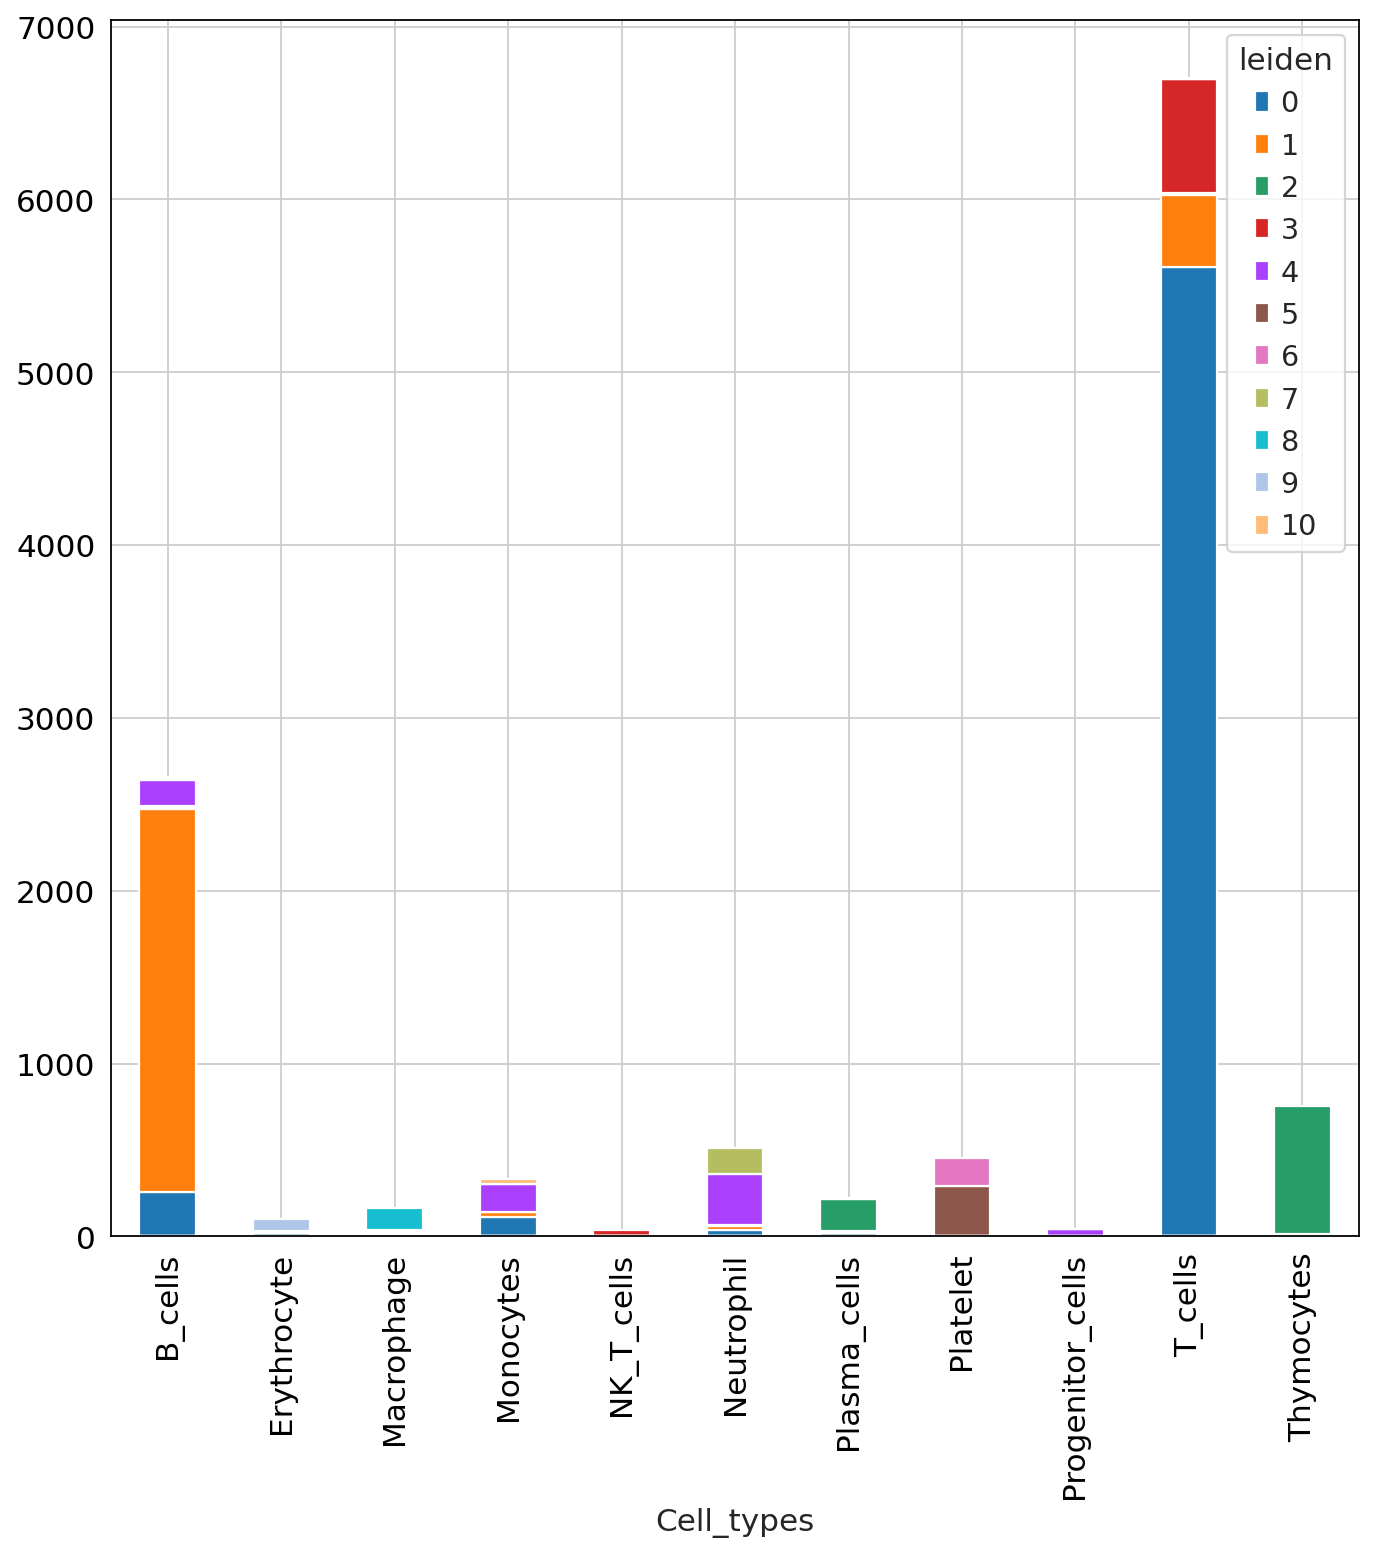

In [74]:
#Stacked Barplot for leiden clusters
cell_type_leiden.plot(kind='bar', stacked=True, figsize=(10,10))


<Axes: xlabel='Cell_types'>

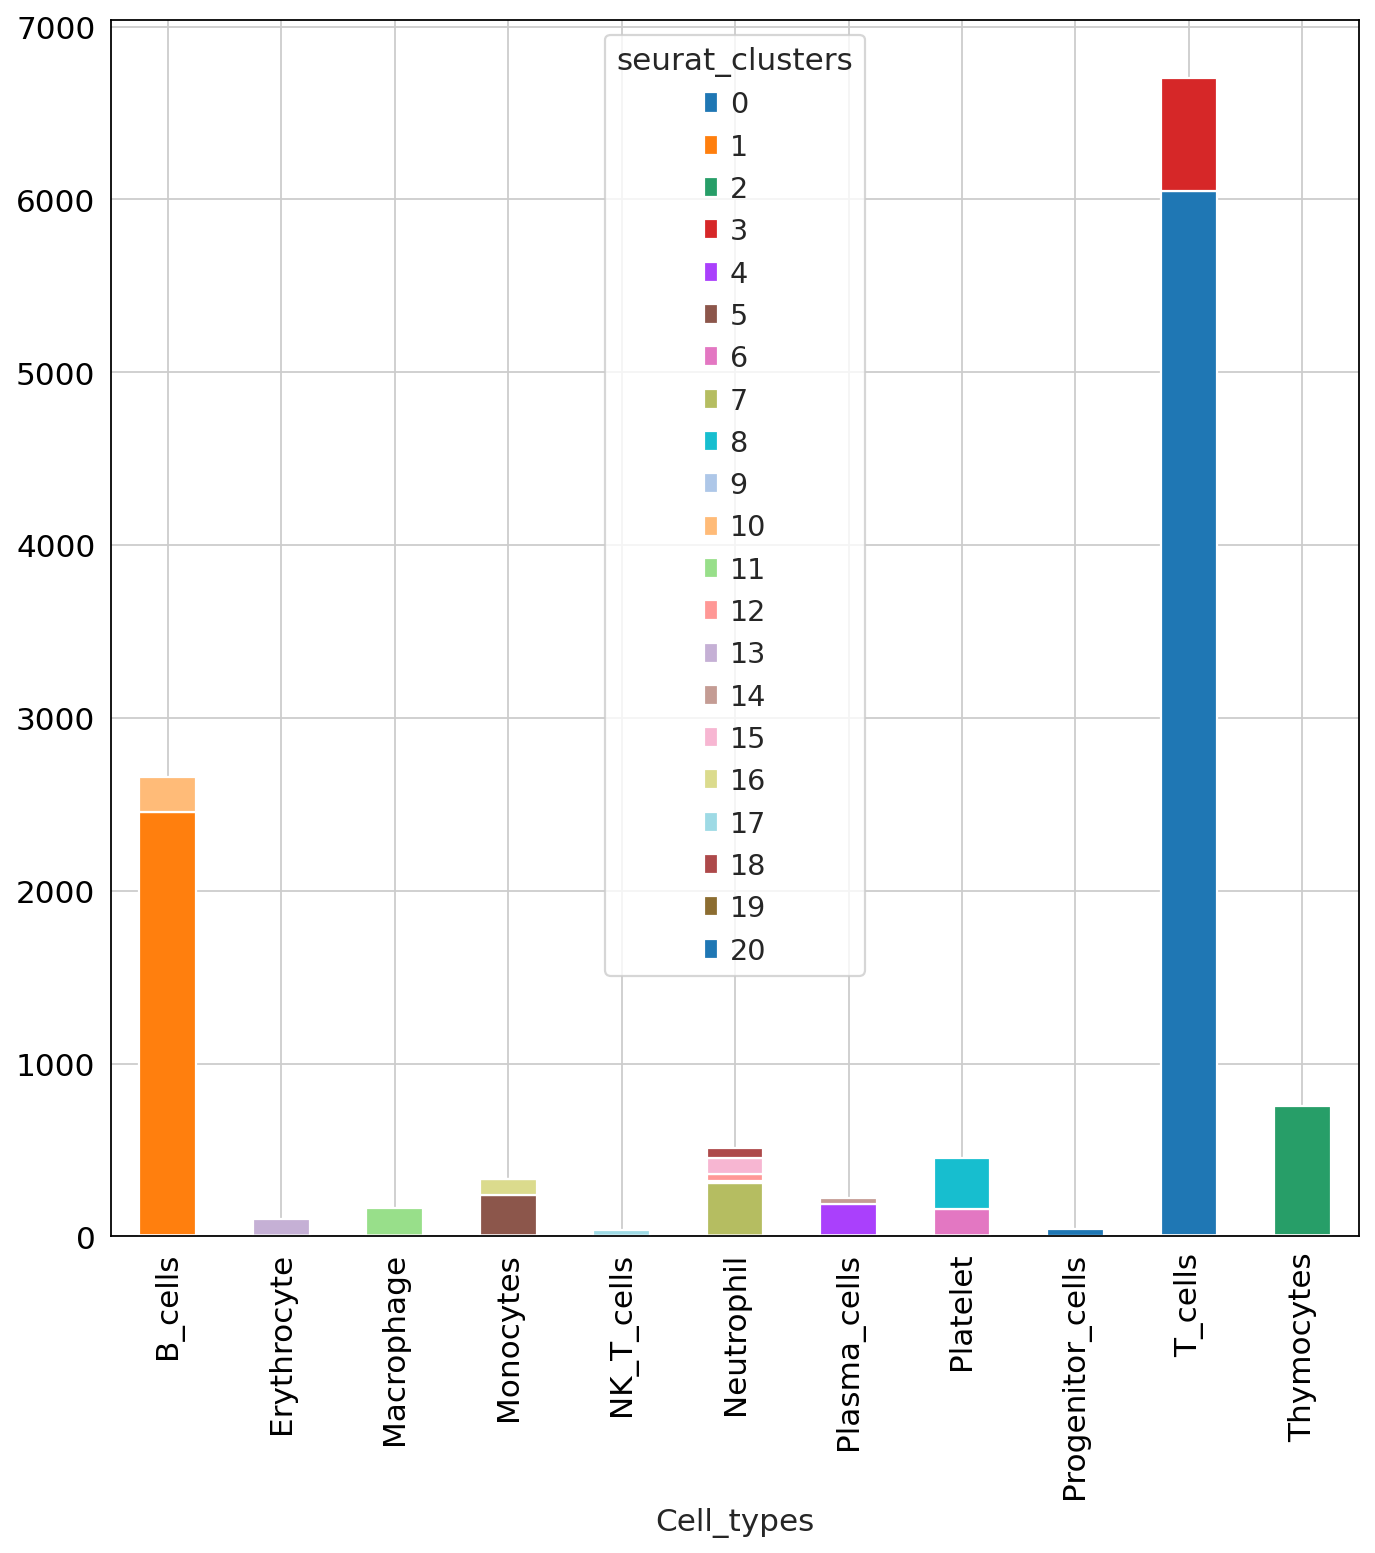

In [75]:
#Stacked Barplot for seurat clusters
cell_type_seurat.plot(kind='bar', stacked=True, figsize=(10,10))

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


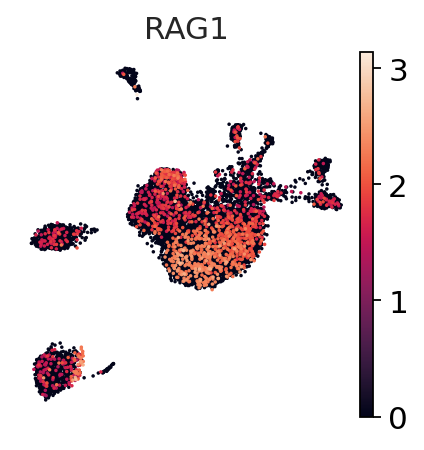

In [77]:
sc.pl.umap(adata_pl,color='RAG1')

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


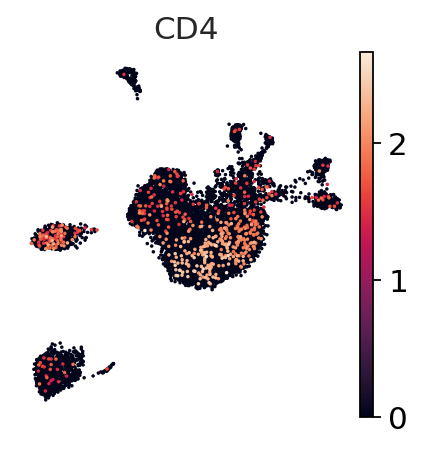

In [82]:
sc.pl.umap(adata_pl,color='CD4')

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


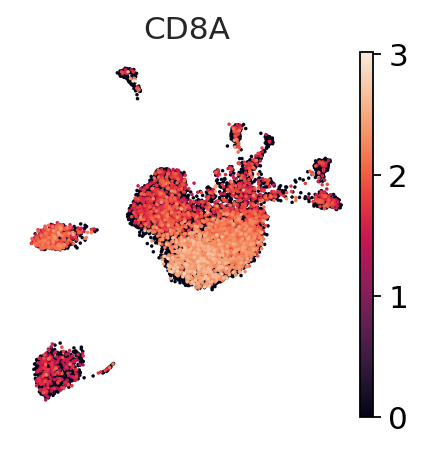

In [87]:
sc.pl.umap(adata_pl,color='CD8A')

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


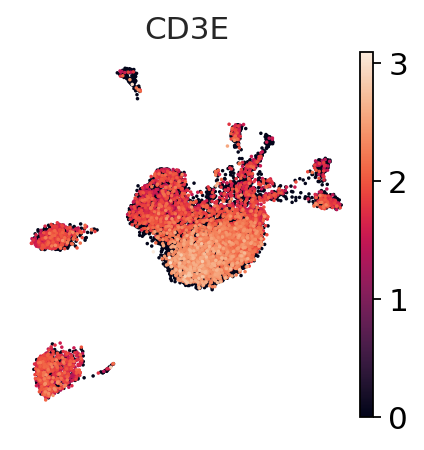

In [94]:
sc.pl.umap(adata_pl,color='CD3E')

In [91]:
adata_pl.var_names

Index(['SPX2', 'gene26599', 'gene26600', 'gene26603', 'gene26611', 'HARB1.1',
       'LORF2', 'gene26619', 'gene26621', 'gene26623',
       ...
       'gene65553', 'H15.1', 'H1.1', 'YG31B.1710', 'TSN31.2', 'RTBS.291',
       'NU5M.1', 'COX1.1', 'COX1.2', 'NU2M'],
      dtype='object', length=29902)

In [129]:
for i in adata_pl.var_names:
    if i.startswith('HB'):
        print(i)

HBAP1
HBP1
HBS1L
HBB2
HBEGF
HBA3
HBA3
HBA3
HBA1
HBB1
HBA2
HBB2


/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:771: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

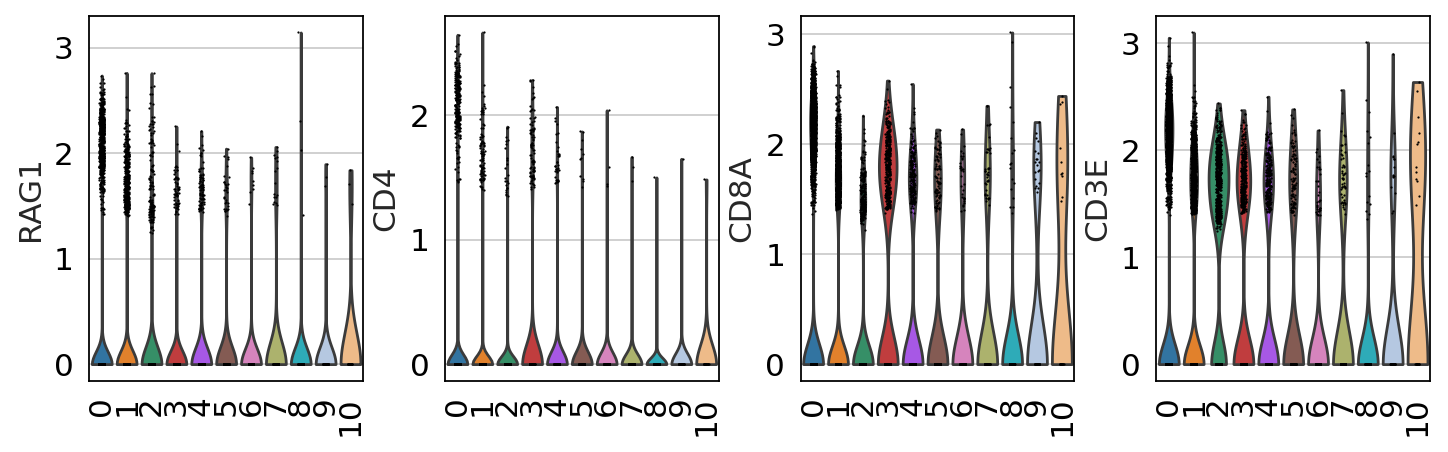

In [98]:
sc.pl.violin(adata_pl, ['RAG1','CD4','CD8A','CD3E'], groupby='leiden', rotation=90)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:771: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

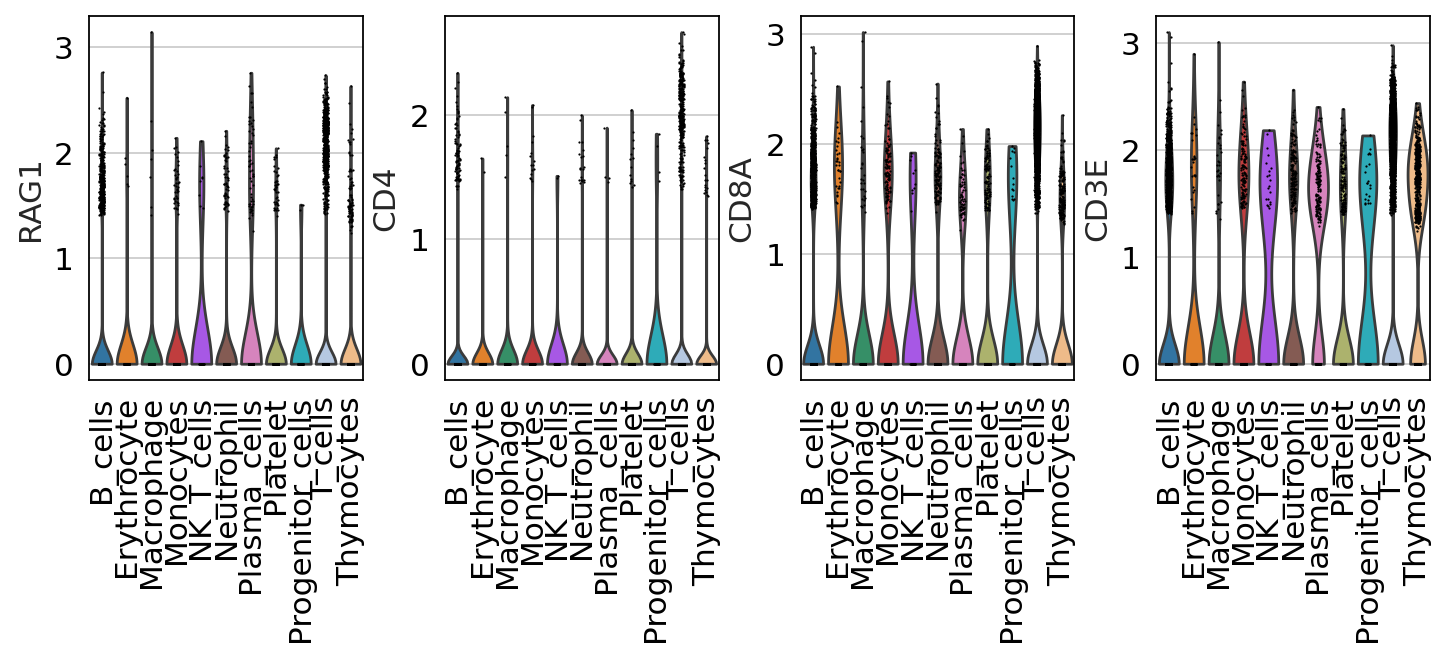

In [103]:
sc.pl.violin(adata_pl, ['RAG1','CD4','CD8A','CD3E'], groupby='Cell_types', rotation=90)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


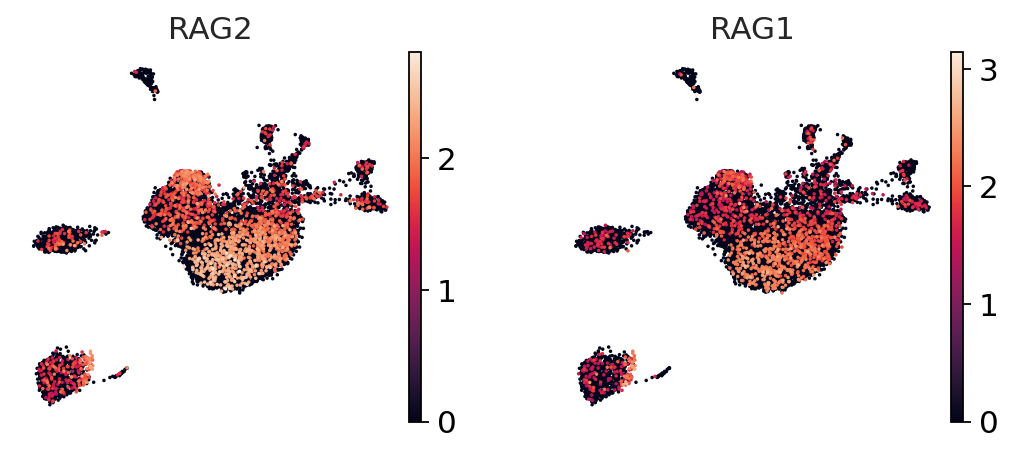

In [106]:
sc.pl.umap(adata_pl,color=['RAG2','RAG1'])

In [261]:
#Testing for Ambient RNA contamination
from scipy.stats import hypergeom
sc.tl.rank_genes_groups(adata_pl, groupby='leiden', method='t-test')
mt_genes = adata_pl.var['mt']

# Initialize a dictionary to store the results
enrichment_results = {}
# Iterate over Leiden clusters
for cluster_name in adata_pl.obs['leiden'].cat.categories:
    # Get the marker genes for the Leiden cluster
    marker_genes = adata_pl.uns['rank_genes_groups']['names'][cluster_name]
    # Calculate the number of overlapping mitochondrial genes
    overlapping_genes = set(marker_genes) & set(mt_genes)
    # Calculate the total number of marker genes
    total_marker_genes = len(marker_genes)
    # Calculate the total number of mitochondrial genes
    total_mitochondrial_genes = len(mt_genes)
    # Perform a hypergeometric test
    p_value = hypergeom.sf(len(overlapping_genes) - 1, total_mitochondrial_genes, total_marker_genes, len(marker_genes))
    # Store the results in the dictionary
    enrichment_results[cluster_name] = {
        'p_value': p_value,
        'enriched_genes': list(overlapping_genes)
    }



In [240]:
enrichment_results.values()

dict_values([{'p_value': 1.0, 'enriched_genes': ['CLK4', 'gene37005', 'HARB1-81', 'DNMBP', 'gene42665', 'gene24508', 'SCUB3', 'CITE3', 'ZBED6-63', 'ETS1B', 'YRD6-287', 'gene47065', 'gene12780', 'POL-1791', 'VLPF-1', 'MEX3D', 'gene54222', 'POL-1736', 'gene10383', 'ERB1-85', 'gene15856', 'LORF2-1583', 'LORF2-1369', 'MATR3', 'PGBD4-49', 'gene12727', 'PLVAP', 'KS6B1', 'AT2A3', 'TIM14', 'FLIP1', 'gene14761', 'MVP', 'CP19A', 'YG31B-357', 'EFC4B', 'PCSK9', 'gene21437', 'gene968', 'CHP1', 'gene54673', 'ALG6', 'MANEA', 'MXRA5-4', 'SLC4A2', 'TLL1', 'POL-922', 'RM13', 'MB12B', 'PGBD4-522', 'gene19962', 'gene33079', 'POL3-123', 'ARAID', 'gene54376', 'gene57592', 'NMDE3', 'gene11676', 'PELO', 'gene16815', 'PINLY-5', 'CBP', 'gene40590', 'F186A-1', 'gene49442', 'CERK1-1', 'gene33611', 'gene30535', 'ZN850-8', 'HDX', 'gene56884', 'POL2-80', 'MON2', 'gene41000', 'SO4A1', 'NKAI4', 'gene59843', 'M860-17', 'LIN1-293', 'GA45A', 'ENTP5', 'gene33909', 'MPP5', 'gene26147', 'RNFT2', 'LORF2-342', 'gene58907', 'C

In [273]:
adata_pl

AnnData object with n_obs × n_vars = 11978 × 29898
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'soup_assign', 'soup_status', 'scds_DropletType', 'combined_status', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'X_name', 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'seurat_clusters_colors', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'PCA', 'UMAP', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'logcounts'
    obsp: 'distances', 'connectivities'